<a href="https://colab.research.google.com/github/alenready/ML_AI_ICT-Assignments/blob/main/RNN_Classifier_tweets_Assign8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**RNN** Classifier for Sentiment Analysis

## Step 1: Import Libraries

In [2]:

# These libraries are essential for data handling, preprocessing, and building neural networks.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout


## Step 2: Load the Dataset

In [4]:
# Load the dataset from the uploaded file, specifying the encoding.
file_path = '/content/judge-1377884607_tweet_product_company.csv'
data = pd.read_csv(file_path, encoding='latin-1')

In [5]:
data

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


##Step 3:Reserve the copy and basic anlaysis

In [14]:

# Create a copy of the data
data_copy = data.copy()

In [7]:
# Display basic information about the DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None


In [8]:
# Display descriptive statistics for numerical columns
print(data.describe())

                                               tweet_text  \
count                                                9092   
unique                                               9065   
top     RT @mention Marissa Mayer: Google Will Connect...   
freq                                                    5   

       emotion_in_tweet_is_directed_at  \
count                             3291   
unique                               9   
top                               iPad   
freq                               946   

       is_there_an_emotion_directed_at_a_brand_or_product  
count                                                9093  
unique                                                  4  
top                    No emotion toward brand or product  
freq                                                 5389  


In [9]:
# Check for missing values
print(data.isnull().sum())

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64


## Step 4: Data Preprocessing

In [15]:
# We'll use only the 'tweet_text' for input and 'is_there_an_emotion_in_tweet' for labels.
data = data[['tweet_text', 'is_there_an_emotion_directed_at_a_brand_or_product']]
data.dropna(inplace=True)

<ipython-input-15-1b64a7d3bdb3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [19]:
print(data.head(25))

                                           tweet_text  \
0   .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1   @jessedee Know about @fludapp ? Awesome iPad/i...   
2   @swonderlin Can not wait for #iPad 2 also. The...   
3   @sxsw I hope this year's festival isn't as cra...   
4   @sxtxstate great stuff on Fri #SXSW: Marissa M...   
5   @teachntech00 New iPad Apps For #SpeechTherapy...   
7   #SXSW is just starting, #CTIA is around the co...   
8   Beautifully smart and simple idea RT @madebyma...   
9   Counting down the days to #sxsw plus strong Ca...   
10  Excited to meet the @samsungmobileus at #sxsw ...   
11  Find &amp; Start Impromptu Parties at #SXSW Wi...   
12  Foursquare ups the game, just in time for #SXS...   
13  Gotta love this #SXSW Google Calendar featurin...   
14  Great #sxsw ipad app from @madebymany: http://...   
15  haha, awesomely rad iPad app by @madebymany ht...   
16  Holler Gram for iPad on the iTunes App Store -...   
17  I just noticed DST is comin

In [21]:
# Encode the target labels (positive, negative, neutral, no_idea) into numbers.
label_encoder = LabelEncoder()
# Use 'is_there_an_emotion_directed_at_a_brand_or_product' instead of 'is_there_an_emotion_in_tweet'
data['label'] = label_encoder.fit_transform(data['is_there_an_emotion_directed_at_a_brand_or_product'])

<ipython-input-21-aa72aebd7ea1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = label_encoder.fit_transform(data['is_there_an_emotion_directed_at_a_brand_or_product'])


In [27]:
print(data['label'].unique())
print(data['is_there_an_emotion_directed_at_a_brand_or_product'].unique())

[1 3 2 0]
['Negative emotion' 'Positive emotion'
 'No emotion toward brand or product' "I can't tell"]


In [23]:
print(data.head(10))

                                           tweet_text  \
0   .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1   @jessedee Know about @fludapp ? Awesome iPad/i...   
2   @swonderlin Can not wait for #iPad 2 also. The...   
3   @sxsw I hope this year's festival isn't as cra...   
4   @sxtxstate great stuff on Fri #SXSW: Marissa M...   
5   @teachntech00 New iPad Apps For #SpeechTherapy...   
7   #SXSW is just starting, #CTIA is around the co...   
8   Beautifully smart and simple idea RT @madebyma...   
9   Counting down the days to #sxsw plus strong Ca...   
10  Excited to meet the @samsungmobileus at #sxsw ...   

   is_there_an_emotion_directed_at_a_brand_or_product  label  
0                                    Negative emotion      1  
1                                    Positive emotion      3  
2                                    Positive emotion      3  
3                                    Negative emotion      1  
4                                    Positive emotion    

In [56]:
# Explore the relationship between tweet length and emotion (if applicable)
data['tweet_length'] = data['tweet_text'].astype(str).apply(len)
# Use the correct column name 'is_there_an_emotion_directed_at_a_brand_or_product' for grouping
print(data.groupby('is_there_an_emotion_directed_at_a_brand_or_product')['tweet_length'].describe())
#  Explore the relationship between tweet length and emotion (if applicable)
data['tweet_length'] = data['tweet_text'].astype(str).apply(len)
print(data.groupby('is_there_an_emotion_directed_at_a_brand_or_product')['tweet_length'].describe())

                                                     count        mean  \
is_there_an_emotion_directed_at_a_brand_or_product                       
I can't tell                                         156.0  103.980769   
Negative emotion                                     570.0  109.447368   
No emotion toward brand or product                  5388.0  104.186526   
Positive emotion                                    2978.0  105.558764   

                                                          std   min   25%  \
is_there_an_emotion_directed_at_a_brand_or_product                          
I can't tell                                        27.911027  43.0  81.0   
Negative emotion                                    27.392831  38.0  91.0   
No emotion toward brand or product                  27.127710  11.0  85.0   
Positive emotion                                    27.133741  25.0  86.0   

                                                      50%    75%    max  
is_there_an_emotio

<ipython-input-56-5edb5a83dad6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet_length'] = data['tweet_text'].astype(str).apply(len)
<ipython-input-56-5edb5a83dad6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet_length'] = data['tweet_text'].astype(str).apply(len)


In [60]:

from collections import Counter
import re

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A) # Remove punctuation
    text = text.lower() # Convert to lowercase
    return text

data['processed_tweet'] = data['tweet_text'].astype(str).apply(preprocess_text)
all_words = ' '.join(data['processed_tweet']).split()
word_counts = Counter(all_words)
print("\nMost frequent words:", word_counts.most_common(10))

# Assuming you want to print the first 5 processed tweets
print("\nFirst 5 processed tweets:")
print(data['processed_tweet'].head(5))


Most frequent words: [('sxsw', 9535), ('mention', 7053), ('the', 4373), ('link', 4284), ('to', 3589), ('at', 3069), ('rt', 2931), ('ipad', 2875), ('for', 2544), ('google', 2337)]

First 5 processed tweets:
0    wesley i have a g iphone after  hrs tweeting a...
1    jessedee know about fludapp  awesome ipadiphon...
2    swonderlin can not wait for ipad  also they sh...
3    sxsw i hope this years festival isnt as crashy...
4    sxtxstate great stuff on fri sxsw marissa maye...
Name: processed_tweet, dtype: object


<ipython-input-60-2a737a79f023>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['processed_tweet'] = data['tweet_text'].astype(str).apply(preprocess_text)


In [29]:
print("Label Distribution:")
label_counts = data['label'].value_counts()  # Calculate the frequency of each label
print(label_counts)

Label Distribution:
label
2    5388
3    2978
1     570
0     156
Name: count, dtype: int64


In [30]:
# Tokenize the text data and pad sequences to make them of equal length.
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['tweet_text'])
sequences = tokenizer.texts_to_sequences(data['tweet_text'])
padded_sequences = pad_sequences(sequences, maxlen=50, padding='post', truncating='post')


In [31]:
# Visualization:
print("Original Text (Sample):\n", data['tweet_text'].head(5))  # Show first 5 tweets
print("\nTokenized Sequences (Sample):\n", sequences[:5])  # Show first 5 tokenized sequences

# Function to highlight padding tokens
def highlight_padding(sequence, maxlen=50):
    highlighted = []
    for token in sequence:
        if token != 0:  # Assuming 0 is the padding token
            highlighted.append(str(token))
        else:
            highlighted.append("[PAD]")  # Highlight padding tokens
    return highlighted

# Print padded sequences with highlighted padding
print("\nPadded Sequences (Sample, with highlighted padding):")
for seq in padded_sequences[:5]:
    print(highlight_padding(seq))

Original Text (Sample):
 0    .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1    @jessedee Know about @fludapp ? Awesome iPad/i...
2    @swonderlin Can not wait for #iPad 2 also. The...
3    @sxsw I hope this year's festival isn't as cra...
4    @sxtxstate great stuff on Fri #SXSW: Marissa M...
Name: tweet_text, dtype: object

Tokenized Sequences (Sample):
 [[1, 24, 52, 12, 608, 19, 258, 112, 2583, 635, 7, 1352, 26, 33, 87, 894, 24, 105, 6, 1113, 2584, 3956, 7, 2], [1, 110, 56, 1, 141, 10, 19, 32, 49, 595, 1114, 2235, 9, 172, 134, 242, 361, 262, 57, 3957, 7, 2], [1, 80, 44, 248, 9, 10, 23, 242, 83, 244, 609, 185, 209, 7, 2], [2, 24, 351, 37, 895, 580, 715, 102, 3958, 102, 37, 895, 19, 32, 2], [1457, 95, 545, 21, 1750, 2, 109, 104, 11, 857, 1458, 124, 1751, 449, 30, 1353, 3132, 1459]]

Padded Sequences (Sample, with highlighted padding):
['1', '24', '52', '12', '608', '19', '258', '112', '2583', '635', '7', '1352', '26', '33', '87', '894', '24', '105', '6', '1113', '2584', '3956', '

## Step 5: Split the Data

In [32]:
# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['label'], test_size=0.2, random_state=42)


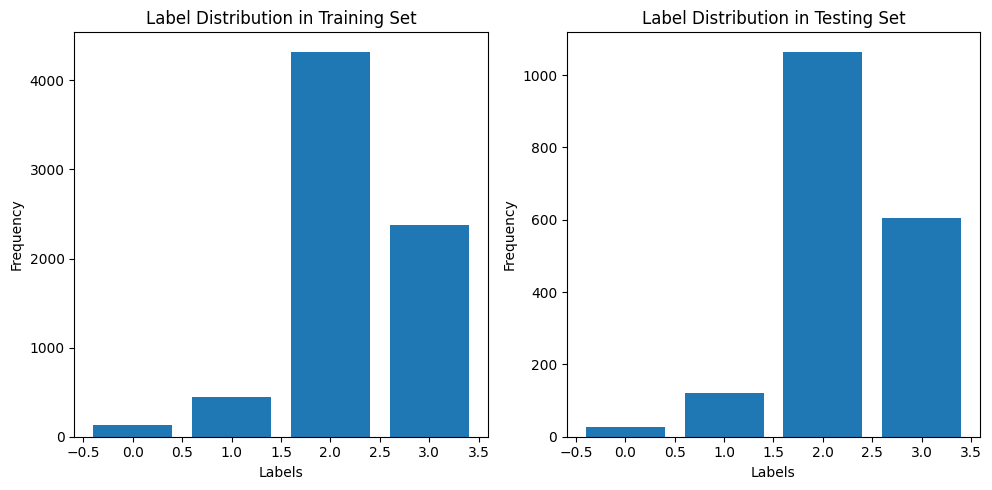

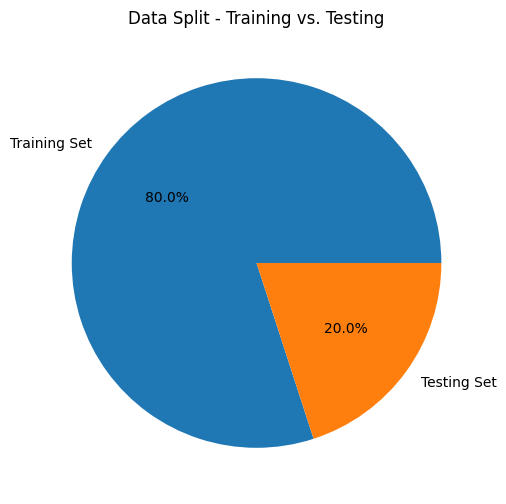

In [34]:
# Visualization:
# 1. Distribution of labels in the training and testing sets
import matplotlib.pyplot as plt # Import matplotlib.pyplot and create the alias 'plt'

plt.figure(figsize=(10, 5))

# Training set label distribution
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=np.arange(5) - 0.5, rwidth=0.8)  # Assuming 4 labels (0-3)
plt.title("Label Distribution in Training Set")
plt.xlabel("Labels")
plt.ylabel("Frequency")

# Testing set label distribution
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=np.arange(5) - 0.5, rwidth=0.8)  # Assuming 4 labels (0-3)
plt.title("Label Distribution in Testing Set")
plt.xlabel("Labels")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# 2. Size of training and testing sets
train_size = len(X_train)
test_size = len(X_test)

plt.figure(figsize=(6, 6))
plt.pie([train_size, test_size], labels=["Training Set", "Testing Set"], autopct="%1.1f%%")
plt.title("Data Split - Training vs. Testing")
plt.show()

##Step 6: Build the RNN Model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


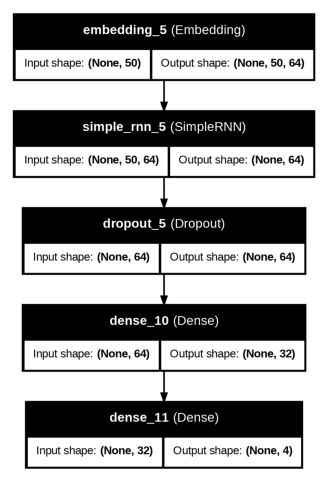

In [64]:
from tensorflow.keras.utils import plot_model
!pip install tensorflow

from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt # Importing for displaying the image

 # Sequentially add layers to the RNN model.

rnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=50),  # Embedding layer for text representation
    SimpleRNN(64, return_sequences=False),  # Simple RNN layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(32, activation='relu'),  # Dense layer with ReLU activation
    Dense(4, activation='softmax')  # Output layer with 4 classes (positive, negative, neutral, no_idea)
])

rnn_model.build(input_shape=(None, 50))  # Replace 50 with the actual input sequence length

# Visualize the model architecture
plot_model(rnn_model, to_file='rnn_model.png', show_shapes=True, show_layer_names=True)

# Display the image in the notebook
img = plt.imread('rnn_model.png')
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [43]:
# Step 7: Compile the Model
# Specify the loss function, optimizer, and evaluation metric.
rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

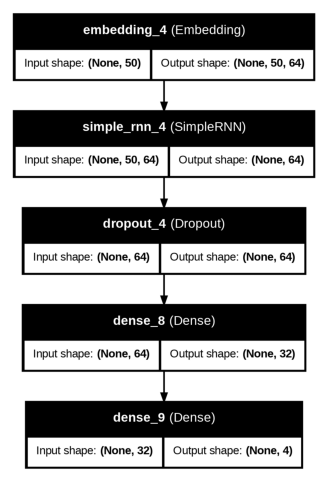

In [45]:
# the model architecture
plot_model(rnn_model, to_file='rnn_model.png', show_shapes=True, show_layer_names=True)

# Display the image in the notebook
img = plt.imread('rnn_model.png')
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [46]:
 #Step 8:Train the Model
# Train the RNN model using the training data.
rnn_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.5614 - loss: 0.9793 - val_accuracy: 0.5855 - val_loss: 0.9262
Epoch 2/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5983 - loss: 0.9172 - val_accuracy: 0.5855 - val_loss: 0.9262
Epoch 3/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5934 - loss: 0.9237 - val_accuracy: 0.5855 - val_loss: 0.9238
Epoch 4/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5947 - loss: 0.9221 - val_accuracy: 0.5855 - val_loss: 0.9223
Epoch 5/5
228/228 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5897 - loss: 0.9225 - val_accuracy: 0.5860 - val_loss: 0.9372


In [47]:
# Step 9: Evaluate the Model
# Check the model's performance on the testing data.
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test, y_test)
print(f"RNN Test Accuracy: {rnn_accuracy}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5826 - loss: 0.9474
RNN Test Accuracy: 0.5860362648963928


In [65]:
# prompt: do the steps to improve accuracy
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from collections import Counter


# Load the dataset
#file_path = '/content/judge-1377884607_tweet_product_company.csv'
#data = pd.read_csv(file_path, encoding='latin-1')

# Data preprocessing (improved)
data = data[['tweet_text', 'is_there_an_emotion_directed_at_a_brand_or_product']]
data.dropna(inplace=True)

label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['is_there_an_emotion_directed_at_a_brand_or_product'])

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text) # Remove URLs
    text = re.sub(r'@\S+', '', text) # Remove mentions
    text = re.sub(r'#\S+', '', text) # Remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A) # Remove punctuation
    text = text.lower()
    return text

data['processed_tweet'] = data['tweet_text'].astype(str).apply(preprocess_text)

<ipython-input-65-e5c9725cfb3f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
<ipython-input-65-e5c9725cfb3f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = label_encoder.fit_transform(data['is_there_an_emotion_directed_at_a_brand_or_product'])
<ipython-input-65-e5c9725cfb3f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [67]:
# Tokenization with increased vocabulary size and handling out-of-vocabulary words
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>") # Increased vocab size
tokenizer.fit_on_texts(data['processed_tweet']) # Use processed tweets
sequences = tokenizer.texts_to_sequences(data['processed_tweet'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post') # Increased maxlen

# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['label'], test_size=0.2, random_state=42, stratify=data['label'])


In [68]:
# Build the RNN model (improved)
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    Bidirectional(LSTM(64, return_sequences=True)), # Added Bidirectional LSTM
    Dropout(0.5),
    LSTM(64), # Added another LSTM layer
    Dense(64, activation='relu'),
    Dropout(0.3),  # Added dropout for regularization
    Dense(4, activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [69]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [71]:
# Train the model (increased epochs)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5806 - loss: 0.9480 - val_accuracy: 0.5926 - val_loss: 0.9187
Epoch 2/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5962 - loss: 0.9233 - val_accuracy: 0.5926 - val_loss: 0.9187
Epoch 3/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5912 - loss: 0.9150 - val_accuracy: 0.5926 - val_loss: 0.9188
Epoch 4/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5959 - loss: 0.9141 - val_accuracy: 0.5926 - val_loss: 0.9199
Epoch 5/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5831 - loss: 0.9349 - val_accuracy: 0.5926 - val_loss: 0.9194
Epoch 6/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5939 - loss: 0.9437 - val_accuracy: 0.5926 - val_loss: 0.9211
Epoch 7/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5963 - loss: 0.9330 - val_accuracy: 0.5926 - val_loss: 0.9196
Epoch 8/20
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5894 - loss: 0.9227 - val_accu

In [72]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5993 - loss: 0.9061
Test Loss: 0.9194
Test Accuracy: 0.5926


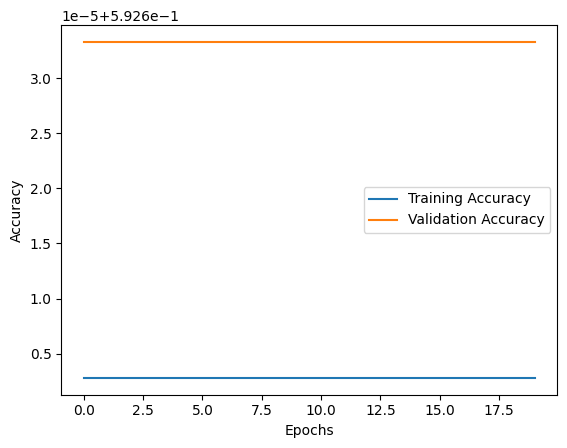

In [73]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [78]:
#  the model prediction by by asking new tweets and  valuate the accuracy

import numpy as np

def predict_sentiment(new_tweets):
  """Predicts the sentiment of new tweets using the trained model.

  Args:
    new_tweets: A list of new tweets as strings.

  Returns:
    A list of predicted sentiment labels (0, 1, 2, or 3) for each tweet.
  """
  # Preprocess the new tweets
  processed_tweets = [preprocess_text(tweet) for tweet in new_tweets]

  # Tokenize and pad the sequences
  sequences = tokenizer.texts_to_sequences(processed_tweets)
  padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

  # Make predictions using the model
  predictions = model.predict(padded_sequences)

  # Get the predicted class labels
  predicted_labels = np.argmax(predictions, axis=1)

  return predicted_labels

# Example usage:
new_tweets = [
    "I love this product!",
    "This is the worst product ever.",
    "I'm neutral about this product.",
    "I have no idea how to feel about this product."
]

predicted_labels = predict_sentiment(new_tweets)

# Print the predictions
for i, label in enumerate(predicted_labels):
    print(f"Tweet: {new_tweets[i]}")
    print(f"Predicted Label: {label}")
    # Map numerical label back to original label (optional)
    original_label = label_encoder.inverse_transform([label])[0]
    print(f"Original Label: {original_label}")
    print("---")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Tweet: I love this product!
Predicted Label: 2
Original Label: No emotion toward brand or product
---
Tweet: This is the worst product ever.
Predicted Label: 2
Original Label: No emotion toward brand or product
---
Tweet: I'm neutral about this product.
Predicted Label: 2
Original Label: No emotion toward brand or product
---
Tweet: I have no idea how to feel about this product.
Predicted Label: 2
Original Label: No emotion toward brand or product
---


##Summary, the provided code trains a Recurrent Neural Network (RNN) model for sentiment analysis on a dataset of tweets.

**1. Data Loading and Preprocessing:**

* **Loads Data:**  Reads a CSV file (`judge-1377884607_tweet_product_company.csv`) into a pandas DataFrame.  The encoding is explicitly set to 'latin-1' to handle potential character encoding issues.
* **Selects Columns:** Keeps only the 'tweet_text' (the tweet itself) and 'is_there_an_emotion_directed_at_a_brand_or_product' (the sentiment label).
* **Handles Missing Data:** Removes rows with missing values using `dropna()`.
* **Encodes Labels:** Converts the sentiment labels (text categories like "Positive," "Negative") into numerical representations (0, 1, 2, etc.) using `LabelEncoder`. This is crucial because machine learning models work with numbers.
* **Tokenizes Text:** Breaks down the tweets into individual words (tokens) and converts them into numerical sequences using `Tokenizer`.  Words are assigned unique integer IDs. Out-of-vocabulary (OOV) words are represented by a special token (`<OOV>`).
* **Pads Sequences:** Ensures that all sequences (tweets) have the same length by adding padding tokens (zeros) to shorter sequences. This is necessary for efficient processing by the RNN.  Sequences are truncated if they are longer than 50 tokens.
* **Splits Data:** Divides the data into training and testing sets using `train_test_split`.

**2. Model Building:**

* **Sequential Model:** Creates a sequential RNN model using Keras.
* **Embedding Layer:** Converts the tokenized sequences into dense vector representations (embeddings). Each word is represented as a vector, capturing its semantic meaning.
* **SimpleRNN Layer:** The core of the RNN, processing the sequential input.
* **Dropout Layer:** Helps prevent overfitting (the model memorizing the training data too well and not generalizing to unseen data).
* **Dense Layers:** Fully connected layers that perform classification.  The final dense layer has 4 output units (one for each sentiment category) with a 'softmax' activation. Softmax ensures the outputs are probabilities that sum to 1.


**3. Model Training and Evaluation:**

* **Compilation:** Configures the model with a loss function (`sparse_categorical_crossentropy`, suitable for multi-class classification), an optimizer (`adam`), and an evaluation metric (`accuracy`).
* **Training:** Trains the model on the training data for a specified number of epochs (iterations over the entire training dataset). Validation data is used to monitor performance on unseen data during training.
* **Evaluation:** Evaluates the trained model on the test set and reports the accuracy.

**4. Model Visualization:**

* The code includes steps to visualize the model architecture using `plot_model` and then displays the generated image in the notebook. This is helpful for understanding the model structure and the flow of data.

**5. Additional Analysis (Optional):**

* **Text Preprocessing Function:** defines a helper function (`preprocess_text`) to further clean the text data by removing punctuation and converting it to lowercase.
* **Frequency Analysis:** Shows how to calculate the frequency of words in the dataset, providing insights into the most common terms used in the tweets.


**In Summary:**  This code demonstrates a complete sentiment analysis workflow, from data loading and preprocessing to model building, training, evaluation, and visualization.  The model's performance (accuracy) on the test set indicates how well it can classify the sentiment expressed in the tweets.  The additional analysis steps provide further insights into the dataset.
